## Задания по SQL

### Задание 1.1.
Необходимо вывести доход, который принесли только хорошие клики (good_clicks)?

Ожидаемый результат:
SQL-запрос
Задание решается без датасета

In [1]:
query = '''
SELECT SUM(revenue) AS good_clicks_revenue
FROM stat_collector
WHERE good_clicks > 0 AND fraud_clicks <=0;
'''

**Можно обойтись без второго условия в Where, но условие задания достаточно размыто.**

### Задание 1.2.
Необходимо вывести топ-10 сайтов по обороту среди тех, которые имеют более 25% плохих кликов.

Ожидаемый результат:
SQL-запрос
Задание решается без датасета

In [2]:
query = '''
WITH sites_stat AS (
  SELECT
    bd.domain_id,
    bd.domain_name,
    SUM(sc.revenue) AS total_revenue,
    SUM(sc.fraud_clicks) AS total_fraud_clicks,
    SUM(sc.good_clicks) AS total_good_clicks,
    (SUM(sc.fraud_clicks) * 1.0) / (SUM(sc.good_clicks) + SUM(sc.fraud_clicks)) AS fraud_percentage
  FROM
    stat_collector sc
  JOIN
    block_domains bd ON sc.block_id = bd.block_id
  GROUP BY
    bd.domain_id,
    bd.domain_name
)

SELECT
  domain_id,
  domain_name,
  total_revenue
FROM
  sites_stat
WHERE
  fraud_percentage > 0.25
ORDER BY
  total_revenue DESC
LIMIT 10;
'''

## Задание по анализу данных

<div style="border:solid green 2px; padding: 20px">

**Кейс**	

Рекламодатель Сигма жалуется на постоянный рост CPA по своим рекламным кампаниям в последние 4 месяца (с июня по сент 2022)

**Задачи исследования:**:

1) Выяснить причину растущего CPA
2) Дать рекомендации по снижению и стабилизации CPA до целевого значения (380 руб)	

**Ход исследования:**
Шаг 1. Загрузка и обработка данных
Шаг 2. Исследовательский анализ данных
Шаг 3. Вывод и рекомендации 

**Исходные данные**	

Лист data	

Описание столбцов таблицы на Листе data	

**Описание столбцов:**	

Client – название клиента	

Device – тип устройства	

Type – тип канала	

Place – тип площадки (только для Type: Direct)	

BannerType – тип объявления	

QueryType – тип запроса (только для Type: Direct , только поиск)	

TargetingType – тип таргетинга (только для Type: Direct)	

Cost - расходы рекламодателя	

Conversions – целевые визиты (только Директ)	

**Ожидаемый результат**	

- Презентация в ppt с выводами и графиками	

- Исходники с расчетами в свободном, но структурированном и читаемом формате (на ваше усмотрение - ссылки на xlsx-файл, data studio, bi и тд)	

**Дополнительная информация**	

Для выполнения задания потребуются базовые знания по Яндекс.Директу.	

Всю информацию можно найти в официальной справке: https://yandex.ru/support/direct/

## Шаг 1. Загрузка и обработка данных

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
data = pd.read_excel('/Users/alexeystarodubtsev/Desktop/Аналитика данных/Задание_стажировка_рекламный аналитик_2023.xlsx', usecols = 'A:L')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10478 entries, 0 to 10477
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Client                   10478 non-null  object        
 1   Month                    10478 non-null  datetime64[ns]
 2   Category                 10478 non-null  object        
 3   Device                   10478 non-null  object        
 4   Place                    10478 non-null  object        
 5   BannerType               10478 non-null  object        
 6   QueryType (search only)  10478 non-null  object        
 7   TargetingType            10478 non-null  object        
 8   Shows                    10478 non-null  int64         
 9   Clicks                   10478 non-null  int64         
 10  Cost                     10478 non-null  float64       
 11  Conversions              10478 non-null  int64         
dtypes: datetime64[ns](1), float64(1)

In [6]:
data = data.drop_duplicates().reset_index(drop=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10478 entries, 0 to 10477
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Client                   10478 non-null  object        
 1   Month                    10478 non-null  datetime64[ns]
 2   Category                 10478 non-null  object        
 3   Device                   10478 non-null  object        
 4   Place                    10478 non-null  object        
 5   BannerType               10478 non-null  object        
 6   QueryType (search only)  10478 non-null  object        
 7   TargetingType            10478 non-null  object        
 8   Shows                    10478 non-null  int64         
 9   Clicks                   10478 non-null  int64         
 10  Cost                     10478 non-null  float64       
 11  Conversions              10478 non-null  int64         
dtypes: datetime64[ns](1), float64(1)

## Шаг 2. Исследовательский анализ данных

### Изменение CPA на протяжении времени (с июня по сентябрь 2022 года).

In [8]:
data = data[data['Client'] == 'Сигма']

start_date = '2022-06-01'
data = data[data['Month'] >= start_date]

In [9]:
monthly_data = data.groupby('Month').agg({'Cost': 'sum', 'Conversions': 'sum'}).reset_index()
monthly_data['CPA'] = monthly_data['Cost'] / monthly_data['Conversions']
monthly_data

,Month,Cost,Conversions,CPA
0,2022-06-01,2.462878e+07,61114,402.997279
1,2022-07-01,2.790863e+07,67365,414.289792
2,2022-08-01,2.739342e+07,59279,462.110071
3,2022-09-01,1.174660e+07,19326,607.813154


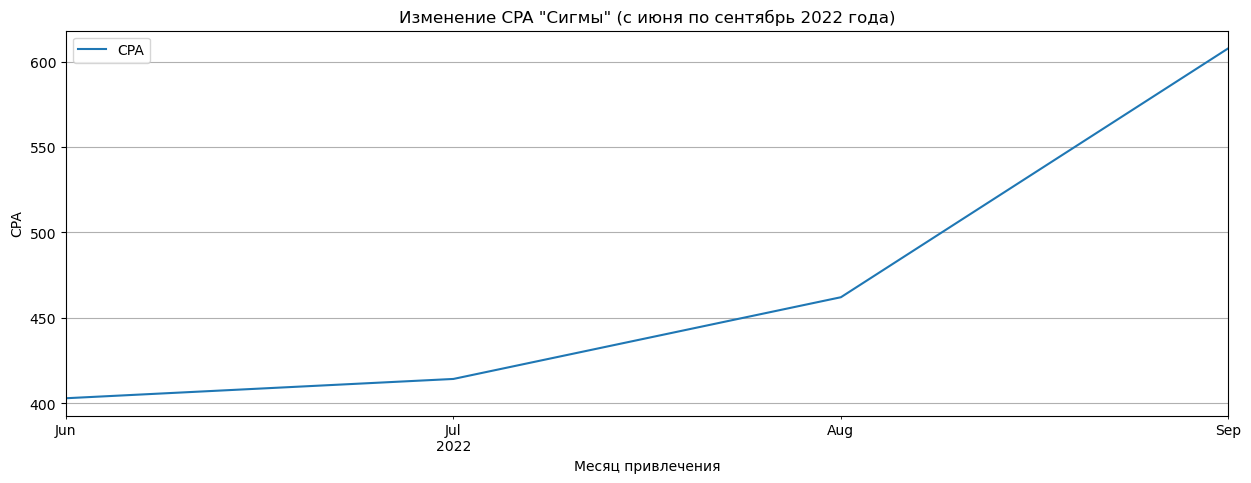

In [10]:
monthly_data.pivot_table(
    index='Month', values='CPA').plot(grid=True, figsize=(15, 5))
plt.ylabel('CPA')
plt.xlabel('Месяц привлечения')
plt.title('Изменение CPA "Сигмы" (с июня по сентябрь 2022 года)')
plt.show()

<div class="alert alert-block alert-danger">
    
**Растущий CPA подтверждён**
</div>

### Распределение CPA по типам устройств, каналам, типам площадок, типам объявлений, типам запросов и типам таргетинга.

#### Распределение CPA по типам устройств

In [11]:
device_monthly_data = data.groupby(['Month', 'Device']).agg({'Cost': 'sum', 'Conversions': 'sum'}).reset_index()
device_monthly_data['CPA'] = device_monthly_data['Cost'] / device_monthly_data['Conversions']
device_monthly_data

,Month,Device,Cost,Conversions,CPA
0,2022-06-01,Desktop,1.053024e+07,21173,497.342872
1,2022-06-01,Mobile,1.409854e+07,39941,352.984028
2,2022-07-01,Desktop,1.160823e+07,22567,514.389681
3,2022-07-01,Mobile,1.630040e+07,44798,363.864457
4,2022-08-01,Desktop,1.148998e+07,20963,548.107684
5,2022-08-01,Mobile,1.590344e+07,38316,415.060066
6,2022-09-01,Desktop,4.864959e+06,7137,681.653170
7,2022-09-01,Mobile,6.881638e+06,12189,564.577762


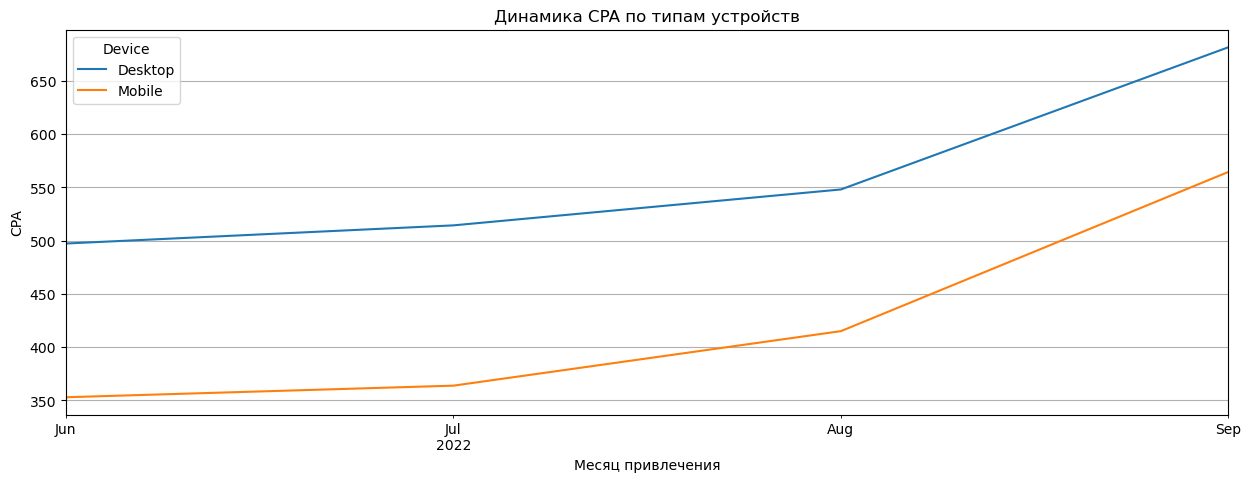

In [12]:
device_monthly_data.pivot_table(
    index='Month', columns='Device', values='CPA').plot(grid=True, figsize=(15, 5))
plt.ylabel('CPA')
plt.xlabel('Месяц привлечения')
plt.title('Динамика CPA по типам устройств')
plt.show()

In [13]:
mobile_device_data = device_monthly_data[device_monthly_data['Device'] == 'Mobile']
mobile_device_data

,Month,Device,Cost,Conversions,CPA
1,2022-06-01,Mobile,1.409854e+07,39941,352.984028
3,2022-07-01,Mobile,1.630040e+07,44798,363.864457
5,2022-08-01,Mobile,1.590344e+07,38316,415.060066
7,2022-09-01,Mobile,6.881638e+06,12189,564.577762


In [14]:
desktop_device_data = device_monthly_data[device_monthly_data['Device'] == 'Desktop']
desktop_device_data

,Month,Device,Cost,Conversions,CPA
0,2022-06-01,Desktop,1.053024e+07,21173,497.342872
2,2022-07-01,Desktop,1.160823e+07,22567,514.389681
4,2022-08-01,Desktop,1.148998e+07,20963,548.107684
6,2022-09-01,Desktop,4.864959e+06,7137,681.653170


#### Распределение CPA по типам площадок размещения

In [15]:
place_monthly_data = data.groupby(['Month', 'Place']).agg({'Cost': 'sum', 'Conversions': 'sum'}).reset_index()
place_monthly_data['CPA'] = place_monthly_data['Cost'] / place_monthly_data['Conversions']
place_monthly_data

,Month,Place,Cost,Conversions,CPA
0,2022-06-01,Networks,8.247536e+06,14097,585.056095
1,2022-06-01,Search,1.638124e+07,47017,348.410999
2,2022-07-01,Networks,1.008246e+07,16094,626.473009
3,2022-07-01,Search,1.782618e+07,51271,347.685343
4,2022-08-01,Networks,1.175258e+07,9721,1208.988667
5,2022-08-01,Search,1.564084e+07,49558,315.606845
6,2022-09-01,Networks,5.633566e+06,2365,2382.057484
7,2022-09-01,Search,6.113031e+06,16961,360.416901


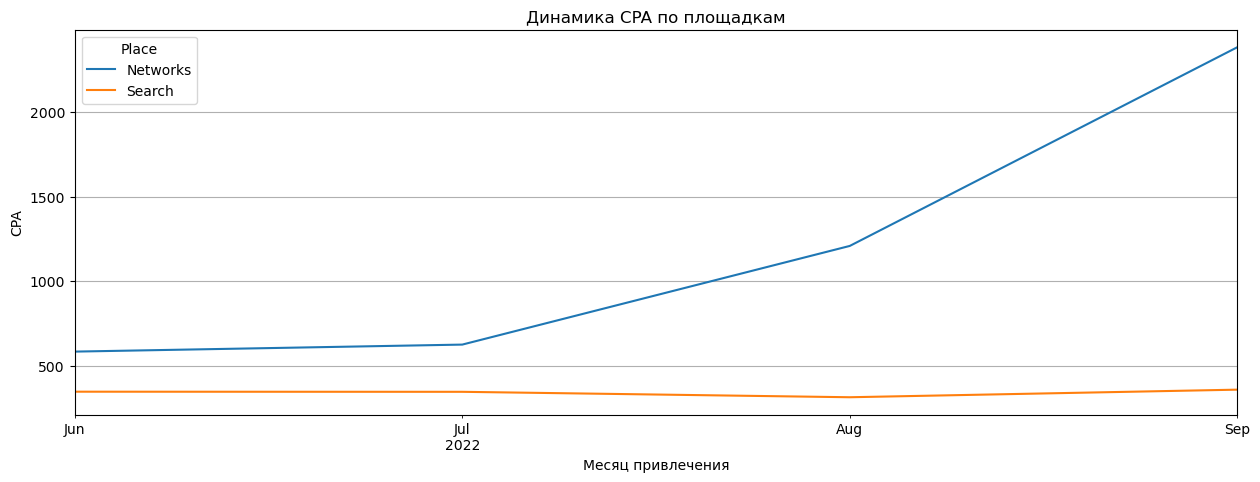

In [16]:
place_monthly_data.pivot_table(
    index='Month', columns='Place', values='CPA').plot(grid=True, figsize=(15, 5))
plt.ylabel('CPA')
plt.xlabel('Месяц привлечения')
plt.title('Динамика CPA по площадкам')
plt.show()

In [17]:
networks_place_data = place_monthly_data[place_monthly_data['Place'] == 'Networks']
networks_place_data

,Month,Place,Cost,Conversions,CPA
0,2022-06-01,Networks,8.247536e+06,14097,585.056095
2,2022-07-01,Networks,1.008246e+07,16094,626.473009
4,2022-08-01,Networks,1.175258e+07,9721,1208.988667
6,2022-09-01,Networks,5.633566e+06,2365,2382.057484


In [18]:
search_place_data = place_monthly_data[place_monthly_data['Place'] == 'Search']
search_place_data

,Month,Place,Cost,Conversions,CPA
1,2022-06-01,Search,1.638124e+07,47017,348.410999
3,2022-07-01,Search,1.782618e+07,51271,347.685343
5,2022-08-01,Search,1.564084e+07,49558,315.606845
7,2022-09-01,Search,6.113031e+06,16961,360.416901


#### Распределение CPA по типам объявлений

In [19]:
bannertype_monthly_data = data.groupby(['Month', 'BannerType']).agg({'Cost': 'sum', 'Conversions': 'sum'}).reset_index()
bannertype_monthly_data['CPA'] = bannertype_monthly_data['Cost'] / bannertype_monthly_data['Conversions']
bannertype_monthly_data

,Month,BannerType,Cost,Conversions,CPA
0,2022-06-01,cpm_banner,0.000000e+00,0,NaN
1,2022-06-01,image_ad,7.117027e+04,8,8896.283307
2,2022-06-01,text,2.455761e+07,61106,401.885338
3,2022-07-01,cpm_banner,0.000000e+00,0,NaN
4,2022-07-01,image_ad,1.264481e+05,15,8429.875346
5,2022-07-01,text,2.778218e+07,67350,412.504584
6,2022-08-01,cpm_banner,0.000000e+00,0,NaN
7,2022-08-01,image_ad,3.162715e+05,4,79067.874445
8,2022-08-01,mcbanner,1.300420e+05,4,32510.494258
9,2022-08-01,text,2.694711e+07,59271,454.642395


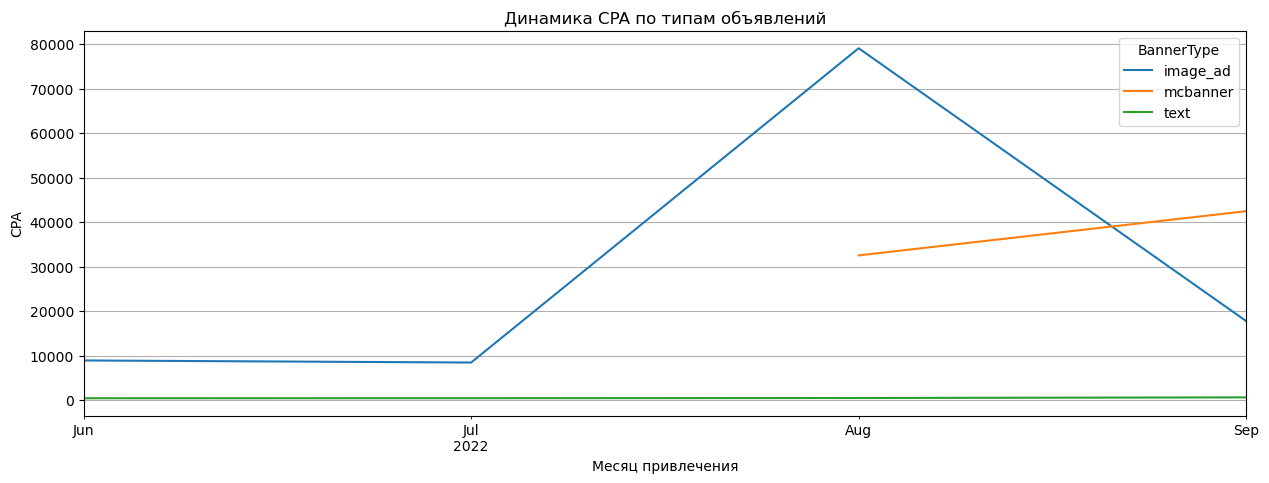

In [20]:
bannertype_monthly_data.pivot_table(
    index='Month', columns='BannerType', values='CPA').plot(grid=True, figsize=(15, 5))
plt.ylabel('CPA')
plt.xlabel('Месяц привлечения')
plt.title('Динамика CPA по типам объявлений')
plt.show()

In [21]:
image_ad_data = bannertype_monthly_data[bannertype_monthly_data['BannerType'] == 'image_ad']
image_ad_data

,Month,BannerType,Cost,Conversions,CPA
1,2022-06-01,image_ad,71170.266458,8,8896.283307
4,2022-07-01,image_ad,126448.130186,15,8429.875346
7,2022-08-01,image_ad,316271.497780,4,79067.874445
11,2022-09-01,image_ad,142000.192169,8,17750.024021


In [22]:
text_data = bannertype_monthly_data[bannertype_monthly_data['BannerType'] == 'text']
text_data

,Month,BannerType,Cost,Conversions,CPA
2,2022-06-01,text,2.455761e+07,61106,401.885338
5,2022-07-01,text,2.778218e+07,67350,412.504584
9,2022-08-01,text,2.694711e+07,59271,454.642395
13,2022-09-01,text,1.156215e+07,19317,598.547951


In [23]:
mcbanner_data = bannertype_monthly_data[bannertype_monthly_data['BannerType'] == 'mcbanner']
mcbanner_data

,Month,BannerType,Cost,Conversions,CPA
8,2022-08-01,mcbanner,130041.977034,4,32510.494258
12,2022-09-01,mcbanner,42446.055763,1,42446.055763


#### Распределение CPA по типам таргетинга.

In [24]:
targetingtype_monthly_data = data.groupby(['Month', 'TargetingType']).agg({'Cost': 'sum', 'Conversions': 'sum'}).reset_index()
targetingtype_monthly_data['CPA'] = targetingtype_monthly_data['Cost'] / targetingtype_monthly_data['Conversions']
targetingtype_monthly_data

,Month,TargetingType,Cost,Conversions,CPA
0,2022-06-01,Autotargeting,1.917680e+05,877,218.663629
1,2022-06-01,Phrase,2.334854e+07,58807,397.036822
2,2022-06-01,Retargeting,1.088463e+06,1430,761.163171
3,2022-07-01,Autotargeting,1.165148e+05,405,287.690795
4,2022-07-01,Phrase,2.619527e+07,65745,398.437452
5,2022-07-01,Retargeting,1.596847e+06,1215,1314.277204
6,2022-08-01,Autotargeting,5.076900e+04,166,305.837321
7,2022-08-01,Phrase,2.470169e+07,58263,423.968667
8,2022-08-01,Retargeting,2.640967e+06,850,3107.020480
9,2022-09-01,Autotargeting,1.354439e+05,395,342.896006


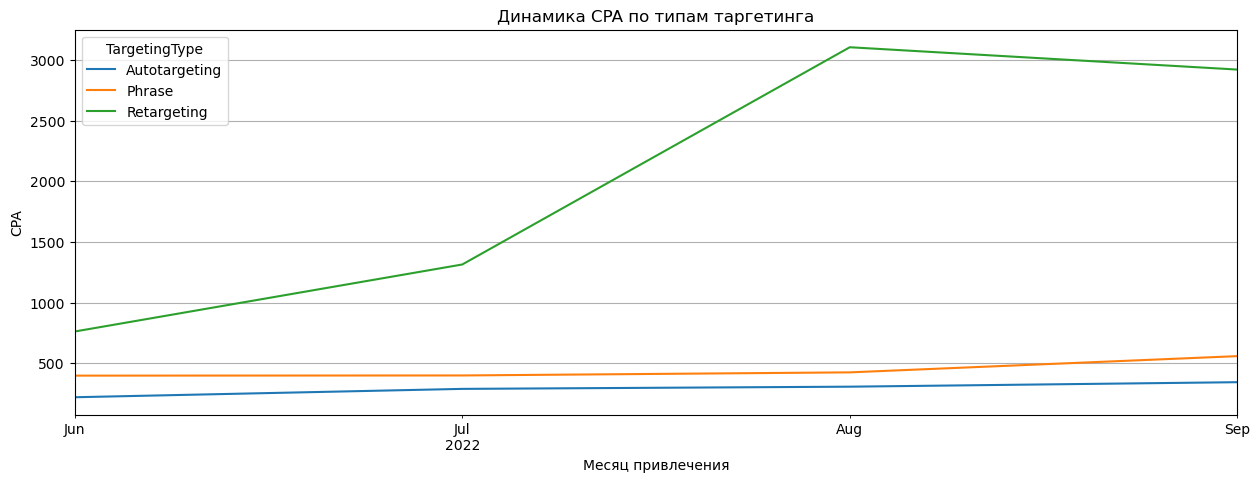

In [25]:
targetingtype_monthly_data.pivot_table(
    index='Month', columns='TargetingType', values='CPA').plot(grid=True, figsize=(15, 5))
plt.ylabel('CPA')
plt.xlabel('Месяц привлечения')
plt.title('Динамика CPA по типам таргетинга')
plt.show()

In [26]:
autotargeting_data = targetingtype_monthly_data[targetingtype_monthly_data['TargetingType'] == 'Autotargeting']
autotargeting_data

,Month,TargetingType,Cost,Conversions,CPA
0,2022-06-01,Autotargeting,191768.002551,877,218.663629
3,2022-07-01,Autotargeting,116514.771941,405,287.690795
6,2022-08-01,Autotargeting,50768.995220,166,305.837321
9,2022-09-01,Autotargeting,135443.922331,395,342.896006


In [27]:
phrase_data = targetingtype_monthly_data[targetingtype_monthly_data['TargetingType'] == 'Phrase']
phrase_data

,Month,TargetingType,Cost,Conversions,CPA
1,2022-06-01,Phrase,2.334854e+07,58807,397.036822
4,2022-07-01,Phrase,2.619527e+07,65745,398.437452
7,2022-08-01,Phrase,2.470169e+07,58263,423.968667
10,2022-09-01,Phrase,1.031343e+07,18487,557.874953


In [28]:
retargeting_data = targetingtype_monthly_data[targetingtype_monthly_data['TargetingType'] == 'Retargeting']
retargeting_data

,Month,TargetingType,Cost,Conversions,CPA
2,2022-06-01,Retargeting,1.088463e+06,1430,761.163171
5,2022-07-01,Retargeting,1.596847e+06,1215,1314.277204
8,2022-08-01,Retargeting,2.640967e+06,850,3107.020480
11,2022-09-01,Retargeting,1.297719e+06,444,2922.790177


#### Распределение CPA по категориям рекламы

In [29]:
category_monthly_data = data.groupby(['Month', 'Category']).agg({'Cost': 'sum', 'Conversions': 'sum'}).reset_index()
category_monthly_data['CPA'] = category_monthly_data['Cost'] / category_monthly_data['Conversions']
category_monthly_data

,Month,Category,Cost,Conversions,CPA
0,2022-06-01,ВКЛАДЫ,3.226326e+05,4733,68.166627
1,2022-06-01,ДЕБЕТОВЫЕ КАРТЫ,8.534004e+05,4207,202.852492
2,2022-06-01,ИПОТЕЧНОЕ КРЕДИТОВАНИЕ,2.224374e+06,3865,575.517167
3,2022-06-01,КРЕДИТНЫЕ КАРТЫ,1.209484e+06,6341,190.740288
4,2022-06-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,1.213021e+07,39858,304.335560
5,2022-06-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,7.888678e+06,2110,3738.709884
6,2022-07-01,ВКЛАДЫ,4.024826e+05,5154,78.091301
7,2022-07-01,ДЕБЕТОВЫЕ КАРТЫ,1.561356e+06,4387,355.905202
8,2022-07-01,ИПОТЕЧНОЕ КРЕДИТОВАНИЕ,3.882904e+06,6798,571.183257
9,2022-07-01,КРЕДИТНЫЕ КАРТЫ,3.178466e+06,13245,239.974789


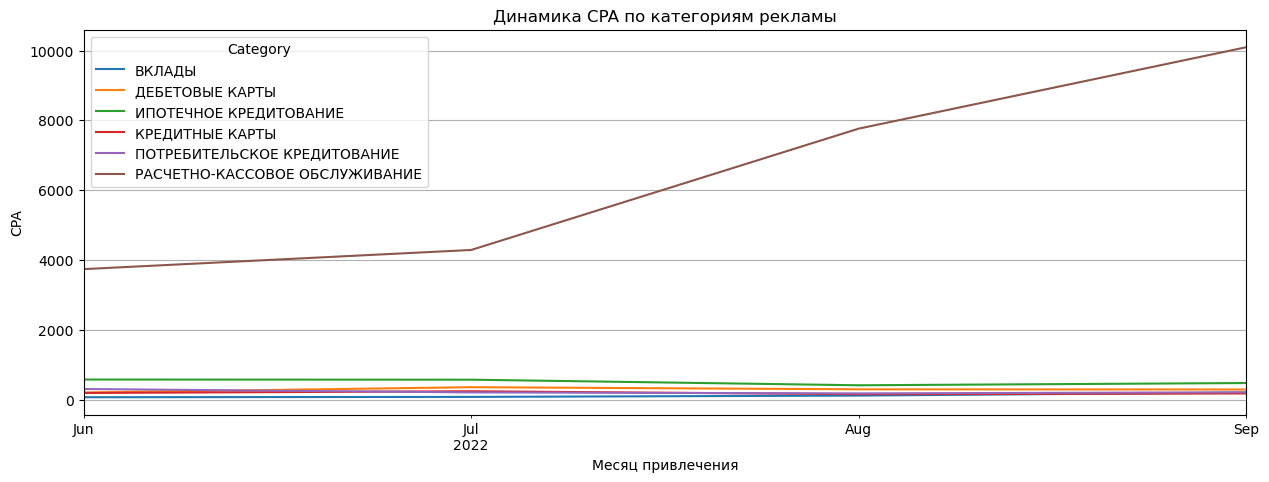

In [30]:
category_monthly_data.pivot_table(
    index='Month', columns='Category', values='CPA').plot(grid=True, figsize=(15, 5))
plt.ylabel('CPA')
plt.xlabel('Месяц привлечения')
plt.title('Динамика CPA по категориям рекламы')
plt.show()

In [31]:
cassa_data = category_monthly_data[category_monthly_data['Category'] == 'РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ']
cassa_data

,Month,Category,Cost,Conversions,CPA
5,2022-06-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,7.888678e+06,2110,3738.709884
11,2022-07-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,1.163129e+07,2713,4287.242225
17,2022-08-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,1.508409e+07,1943,7763.300426
23,2022-09-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,6.844504e+06,678,10095.138745


## Шаг 3. Вывод и рекомендации

In [32]:
monthly_data = monthly_data.drop(columns=['Cost', 'Conversions'])
monthly_data

,Month,CPA
0,2022-06-01,402.997279
1,2022-07-01,414.289792
2,2022-08-01,462.110071
3,2022-09-01,607.813154


#### Уберём неэффективную рекламу

In [33]:
filtered_data = data[data['BannerType'] != 'image_ad']
filtered_data = filtered_data[filtered_data['TargetingType'] != 'Retargeting']
filtered_data = filtered_data[filtered_data['BannerType'] != 'mcbanner']
filtered_data = filtered_data[filtered_data['Place'] != 'Networks'] #самое резкое снижение
filtered_data = filtered_data[filtered_data['Category'] != 'РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ']

In [34]:
monthly_filtered_data = filtered_data.groupby('Month').agg({'Cost': 'sum', 'Conversions': 'sum'}).reset_index()
monthly_filtered_data['CPA'] = monthly_filtered_data['Cost'] / monthly_filtered_data['Conversions']
monthly_filtered_data = monthly_filtered_data.drop(columns=['Cost', 'Conversions'])
monthly_filtered_data

,Month,CPA
0,2022-06-01,263.333885
1,2022-07-01,235.869280
2,2022-08-01,217.508794
3,2022-09-01,255.746485


**Если убрать рекламу для компьютеров**

In [35]:
filtered_data_desktop = filtered_data[filtered_data['Device'] != 'Desktop']
monthly_filtered_data = filtered_data_desktop.groupby('Month').agg({'Cost': 'sum', 'Conversions': 'sum'}).reset_index()
monthly_filtered_data['CPA'] = monthly_filtered_data['Cost'] / monthly_filtered_data['Conversions']
monthly_filtered_data = monthly_filtered_data.drop(columns=['Cost', 'Conversions'])
monthly_filtered_data

,Month,CPA
0,2022-06-01,226.894395
1,2022-07-01,190.128983
2,2022-08-01,171.732324
3,2022-09-01,202.367057


**Если убрать рекламу для мобильных**

In [36]:
filtered_data_mobile = filtered_data[filtered_data['Device'] != 'Mobile']
monthly_filtered_data = filtered_data_mobile.groupby('Month').agg({'Cost': 'sum', 'Conversions': 'sum'}).reset_index()
monthly_filtered_data['CPA'] = monthly_filtered_data['Cost'] / monthly_filtered_data['Conversions']
monthly_filtered_data

,Month,Cost,Conversions,CPA
0,2022-06-01,5.229528e+06,15735,332.350069
1,2022-07-01,5.457627e+06,16781,325.226540
2,2022-08-01,5.033758e+06,16462,305.780464
3,2022-09-01,2.067476e+06,5880,351.611579
